In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/ratnamb.ojha/Downloads/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Shape of dataset

In [4]:
df.shape

(1000, 8)

# Dataset Information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

# Data Checks to perform 
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

 Shows that there are no missing values in the given dataset

## Check Duplicates

In [6]:
df.duplicated().sum()

0

Shows that there are no duplicates in the dataset.

## Check the data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Shows us the number of dtypes and null or non-null. 
Also shows us how many objects and int types exist

## Checking number of unique values in columns

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Check Statistics of fdta

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## We get some insights from the  data:
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

# Exploring Data:

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


## Specifying numerical and categorical columns

In [16]:
# Define numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['math score', 'reading score', 'writing score', 'total score', 'average']
Categorical Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Adding columns for "Total score" and "Average score"

In [13]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()  

print("Number of students with full score in reading:", reading_full)
print("Number of students with full score in writing:", writing_full)
print("Number of students with full score in math:", math_full)

Number of students with full score in reading: 17
Number of students with full score in writing: 14
Number of students with full score in math: 7


## Students with less than 20 marks in all subjects

In [21]:
reading_less_20 = df[df['reading score'] < 20]['average'].count()
writing_less_20 = df[df['writing score'] < 20]['average'].count()
math_less_20 = df[df['math score'] < 20]['average'].count()

print("Number of students with less than 20 in reading:", reading_less_20)
print("Number of students with less than 20 in writing:", writing_less_20)
print("Number of students with less than 20 in math:", math_less_20)

Number of students with less than 20 in reading: 1
Number of students with less than 20 in writing: 3
Number of students with less than 20 in math: 4


## Visualizing data

### Using Histograms and KDE:

Text(0.5, 1.0, 'Writing Score Distribution')

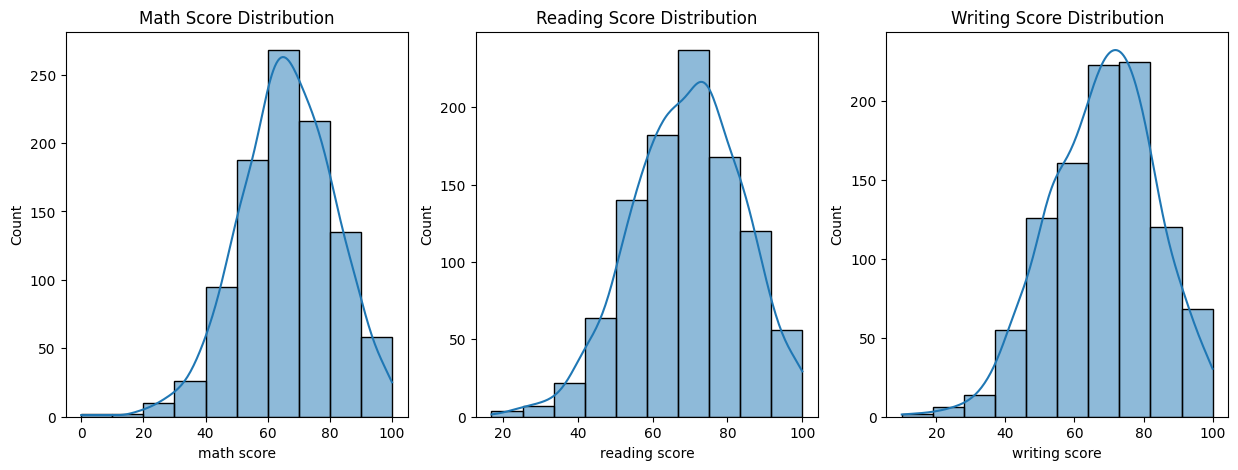

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['math score'], bins=10, kde=True, ax=axes[0])
sns.histplot(df['reading score'], bins=10, kde=True, ax=axes[1])
sns.histplot(df['writing score'], bins=10, kde=True, ax=axes[2])
axes[0].set_title('Math Score Distribution')
axes[1].set_title('Reading Score Distribution')
axes[2].set_title('Writing Score Distribution')


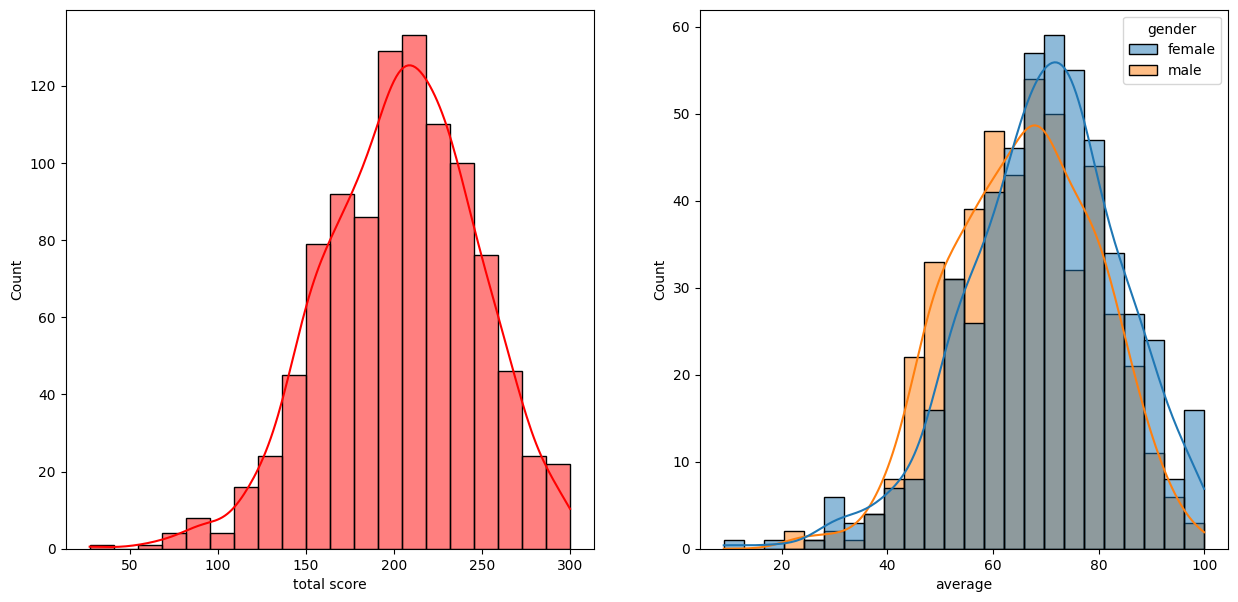

In [24]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', kde=True, bins=20, color="red")
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True,  hue="gender")
plt.show()

In [25]:
df.lunch 

0          standard
1          standard
2          standard
3      free/reduced
4          standard
           ...     
995        standard
996    free/reduced
997    free/reduced
998        standard
999    free/reduced
Name: lunch, Length: 1000, dtype: object

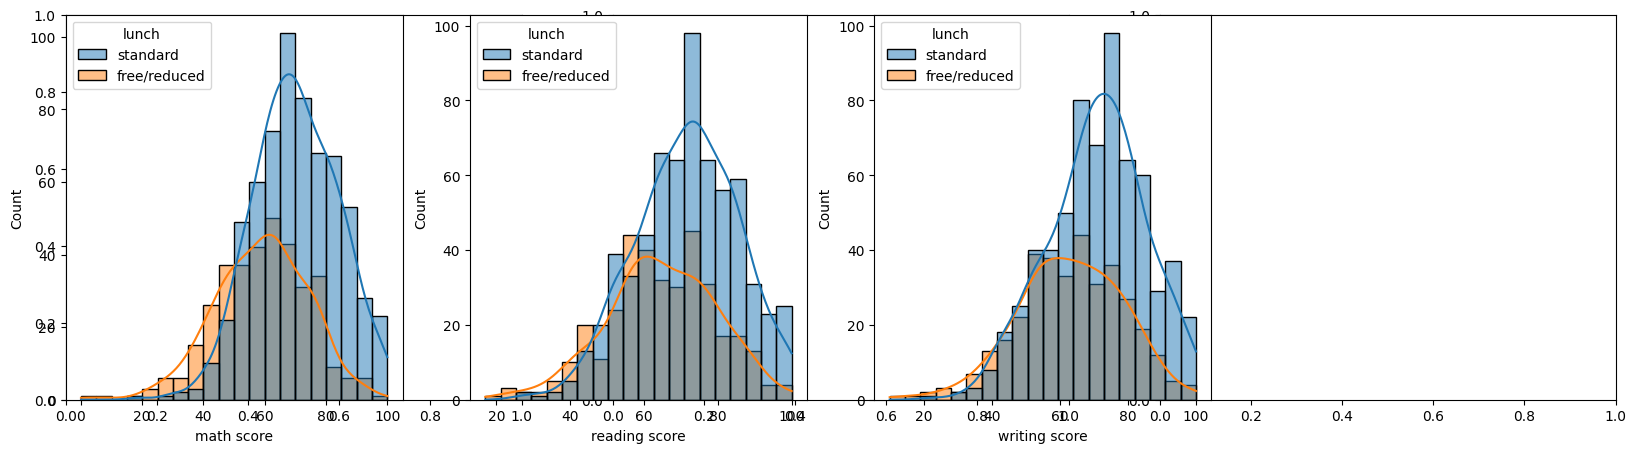

In [31]:
plt.subplots(1,3, figsize=(20,5))
plt.subplot(141)
sns.histplot(data=df, x='math score', hue='lunch', kde=True, bins=20)
plt.subplot(142)
sns.histplot(data=df, x='reading score', hue='lunch', kde=True, bins=20)
plt.subplot(143)
sns.histplot(data=df, x='writing score', hue='lunch', kde=True, bins=20)
plt.show()

### Insight:
- Upon having a standard lunch, the math score, reading score and writing score increase.
- Standard lunch enables a child to perform better, be it male or a female

### How parental level of education effect the child's scores:

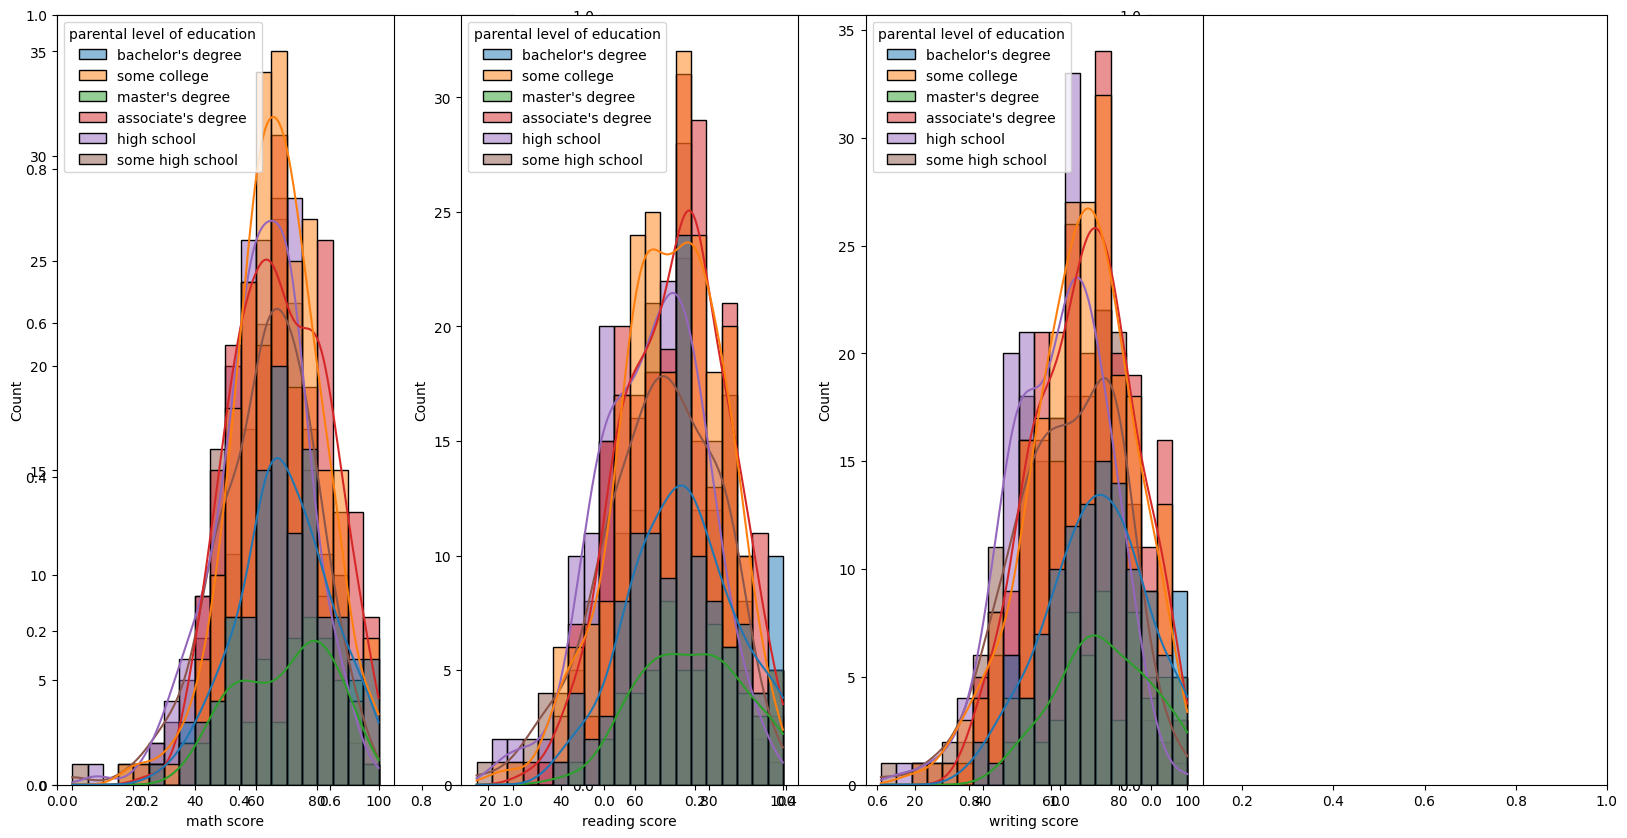

In [35]:
plt.subplots(1,3, figsize=(20,10))
plt.subplot(141)
sns.histplot(data=df, x='math score', hue='parental level of education', kde=True, bins=20)
plt.subplot(142)    
sns.histplot(data=df, x='reading score', hue='parental level of education', kde=True, bins=20)
plt.subplot(143)
sns.histplot(data=df, x='writing score', hue='parental level of education', kde=True, bins=20)
plt.show()